In [1]:
import pandas as pd
from sqlalchemy import create_engine
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#db params

db_username_0 = 'postgres'
db_password_0 = 'Simulation2024'
db_host_0 = 'localhost'
db_port_0 = '5432'
db_name_0 = 'simulationdatainit'
table_name_0 = 'simulationsagg4'

In [3]:
#Creating connection and extracting data

connection_string = f"postgresql://{db_username_0}:{db_password_0}@{db_host_0}:{db_port_0}/{db_name_0}"
engine = create_engine(connection_string)
query = f"SELECT * FROM {table_name_0}"
df_0 = pd.read_sql(query, engine)

In [4]:
df_0.head()

,individual_run_id,epsilon,n_zero_square,reversal_count,average_reversal_time,reversal_times,reversal_durations,positive_values,negative_values
0,1,0.152642,596.36,18,111.118684,"[22.708000000000002, 176.794, 188.654, 228.528...","[22.708000000000002, 154.086, 11.8599999999999...",809812,1190188
1,2,0.152642,596.36,11,173.582333,"[104.665, 273.377, 323.64, 627.923, 826.485, 9...","[104.665, 168.712, 50.26299999999998, 304.283,...",956619,1043381
2,3,0.152642,596.36,16,122.044941,"[11.997, 105.0, 236.756, 412.651, 816.535, 876...","[11.997, 93.003, 131.756, 175.895, 403.8839999...",1197437,802563
3,4,0.152642,596.36,15,127.021812,"[178.076, 273.814, 371.882, 379.104, 672.871, ...","[178.076, 95.73800000000003, 98.06799999999998...",1285406,714594
4,5,0.152642,596.36,10,191.182636,"[19.189, 280.36400000000003, 376.455, 757.865,...","[19.189, 261.175, 96.09099999999995, 381.41, 3...",831082,1168918


In [5]:
len(df_0)

15000

In [6]:
unique_combos = df_0.drop_duplicates(subset=['epsilon', 'n_zero_square'])
unique_combos = unique_combos[['epsilon', 'n_zero_square']]
unique_combos

,epsilon,n_zero_square
0,0.152642,596.360000
1336,0.237142,944.933951
2741,0.123943,318.864022
2837,0.196791,691.477740
7529,0.101057,226.553750
10568,0.066420,112.202062


In [7]:
df_0 = df_0[(df_0['epsilon'] == .1967910497548276) & (df_0['n_zero_square'] == 691.4777400853942)]
len(df_0)

2500

In [8]:
df_0.head()

,individual_run_id,epsilon,n_zero_square,reversal_count,average_reversal_time,reversal_times,reversal_durations,positive_values,negative_values
2837,10527,0.196791,691.47774,16,131.398824,"[14.736, 27.499000000000002, 106.117, 329.297,...","[14.736, 12.763000000000002, 78.618, 223.18, 2...",1097584,902416
3033,10663,0.196791,691.47774,16,120.414941,"[120.983, 261.67, 282.688, 396.137, 663.703, 8...","[120.983, 140.687, 21.017999999999972, 113.449...",910210,1089790
3143,11620,0.196791,691.47774,13,161.068643,"[222.704, 608.58, 704.863, 780.958, 785.911000...","[222.704, 385.87600000000003, 96.2830000000000...",975961,1024039
3169,12103,0.196791,691.47774,14,162.716200,"[166.20600000000002, 234.792, 252.76, 556.724,...","[166.20600000000002, 68.58599999999998, 17.967...",1077818,922182
3774,10868,0.196791,691.47774,16,118.665941,"[177.814, 228.077, 349.416, 694.814, 831.301, ...","[177.814, 50.263000000000005, 121.339, 345.397...",1078661,921339


In [9]:
#Defining common filter functions

def any_values_less_than_5(duration_list):
    return any(value < 5 for value in duration_list)

def sum_values_less_than_5(duration_list):
    return sum(value < 5 for value in duration_list)

def update_reversal_durations(df, simulation_end):
    for index, row in df.iterrows():
        full_range = [0] + row['reversal_times'] + [simulation_end]
        durations = [round(full_range[i + 1] - full_range[i], 2) for i in range(len(row['reversal_times']) + 1)]
        df.at[index, 'reversal_durations'] = durations
    return df

def calculate_average_reversal_time_excluding_last(reversal_durations):
    average_reversal_time = np.mean(reversal_durations[:-1])
    return average_reversal_time

def calculate_average_reversal_time(reversal_durations):
    average_reversal_time = np.mean(reversal_durations)
    return average_reversal_time

In [10]:
#Changing df_0 into cleaned_df_0

df_0 = df_0[(df_0['reversal_count'] > 0)]
df_0[((df_0['positive_values'] + df_0['negative_values']) > 2000000)]
df_0 = update_reversal_durations(df_0, 2000)
df_0['average_reversal_time'] = df_0['reversal_durations'].apply(calculate_average_reversal_time)
df_0['average_reversal_time_excluding_last'] = df_0['reversal_durations'].apply(calculate_average_reversal_time_excluding_last)

df_0_AnyLessThan5 = df_0['reversal_durations'].apply(any_values_less_than_5)
df_0['any_less_than_5'] = df_0_AnyLessThan5
df_0[(df_0['any_less_than_5'] == True)].head()
df_0_cleaned = df_0[(df_0['any_less_than_5'] == False)]
df_0_cleaned.head()

,individual_run_id,epsilon,n_zero_square,reversal_count,average_reversal_time,reversal_times,reversal_durations,positive_values,negative_values,average_reversal_time_excluding_last,any_less_than_5
2837,10527,0.196791,691.47774,16,117.647647,"[14.736, 27.499000000000002, 106.117, 329.297,...","[14.74, 12.76, 78.62, 223.18, 238.42, 119.45, ...",1097584,902416,110.389375,False
3033,10663,0.196791,691.47774,16,117.647059,"[120.983, 261.67, 282.688, 396.137, 663.703, 8...","[120.98, 140.69, 21.02, 113.45, 267.57, 136.59...",910210,1089790,122.059375,False
3169,12103,0.196791,691.47774,14,133.334000,"[166.20600000000002, 234.792, 252.76, 556.724,...","[166.21, 68.59, 17.97, 303.96, 127.94, 105.64,...",1077818,922182,111.376429,False
3774,10868,0.196791,691.47774,16,117.647059,"[177.814, 228.077, 349.416, 694.814, 831.301, ...","[177.81, 50.26, 121.34, 345.4, 136.49, 27.48, ...",1078661,921339,123.917500,False
3849,10997,0.196791,691.47774,16,117.646471,"[14.527000000000001, 79.98, 261.434, 386.13100...","[14.53, 65.45, 181.45, 124.7, 12.3, 38.41, 257...",1304008,695992,102.031875,False


In [11]:
len(df_0_cleaned)

1416

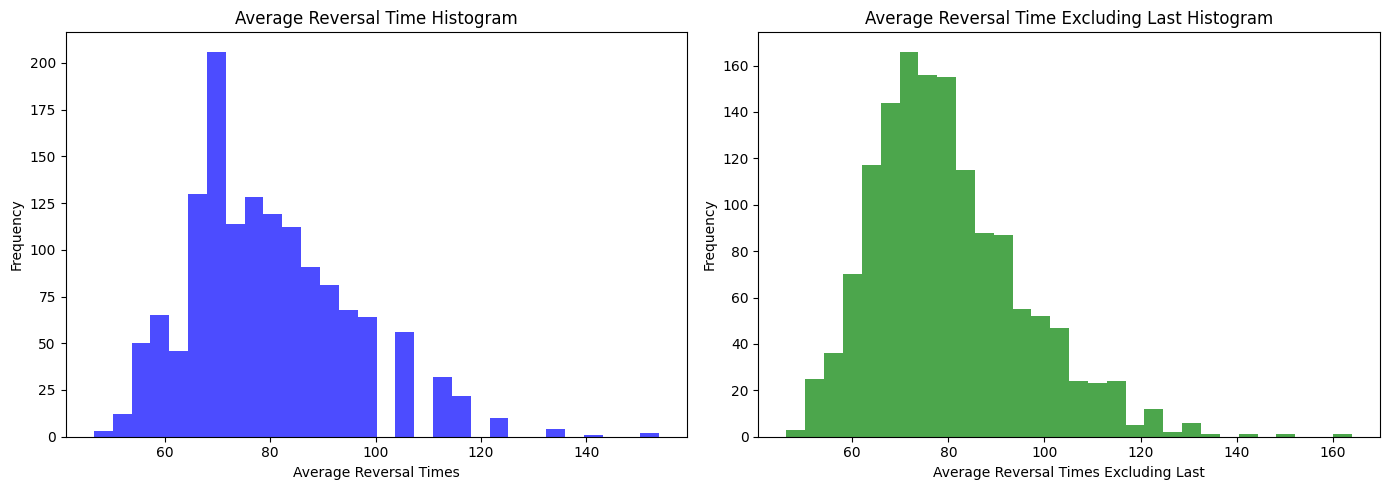

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].hist(df_0_cleaned['average_reversal_time'], bins=30, color='blue', alpha=0.7)
axs[0].set_title('Average Reversal Time Histogram')
axs[0].set_xlabel('Average Reversal Times')
axs[0].set_ylabel('Frequency')

axs[1].hist(df_0_cleaned['average_reversal_time_excluding_last'], bins=30, color='green', alpha=0.7)
axs[1].set_title('Average Reversal Time Excluding Last Histogram')
axs[1].set_xlabel('Average Reversal Times Excluding Last')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

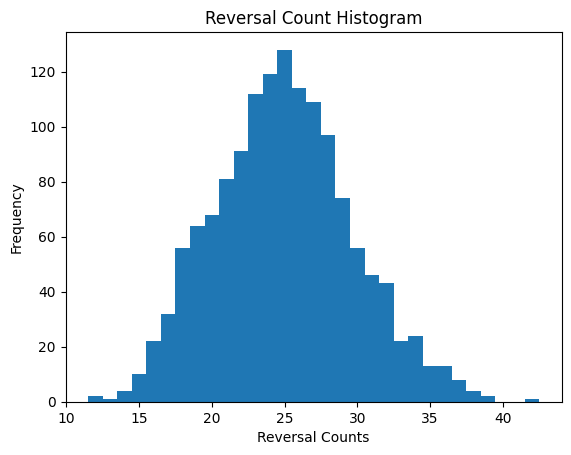

In [13]:
bin_edges = np.arange(start=df_0_cleaned['reversal_count'].min() - .5,
                      stop= df_0_cleaned['reversal_count'].max() + 1.5)
df_0_cleaned['reversal_count'].plot(kind = 'hist', bins = bin_edges, align = 'mid')
plt.title('Reversal Count Histogram')
plt.xlabel('Reversal Counts')
plt.show()